In [1]:
import torchvision.datasets as datasets
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torch.optim as optim

In [2]:
data_path = "path"
#spara dataset

In [3]:
#ladda dataset
mnist_train = datasets.MNIST(root=data_path, train=True, download=True)
mnist_test = datasets.MNIST(root=data_path, train=False, download=True)

In [4]:
#visa antal exemple
print("Antal exempel i träningsuppsättningen:", len(mnist_train))
print("Antal exempel i testuppsättningen:", len(mnist_test))

Antal exempel i träningsuppsättningen: 60000
Antal exempel i testuppsättningen: 10000


In [5]:
#visa storleken på bilder
print("Storlek på bilder i MNIST-datasetet:", mnist_train[0][0].size)


Storlek på bilder i MNIST-datasetet: (28, 28)


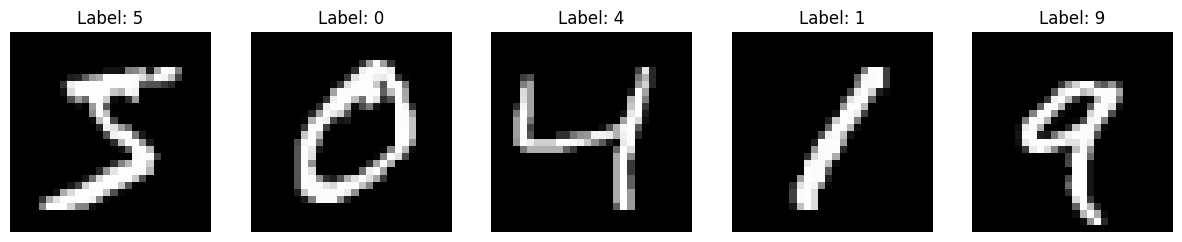

In [6]:
# Visa några exempelbilder från träningsuppsättningen
num_examples_to_show = 5
fig, axes = plt.subplots(1, num_examples_to_show, figsize=(15, 3))
for i in range(num_examples_to_show):
    image, label = mnist_train[i]
    axes[i].imshow(np.array(image), cmap='gray')
    axes[i].set_title("Label: {}".format(label))
    axes[i].axis('off')
plt.show()

In [7]:
# Definiera transformations för att konvertera bilderna till tensorer och normalisera dem
transform = transforms.Compose([
    transforms.ToTensor(),  # Konvertera bilderna till tensorer
    transforms.Normalize((0.5,), (0.5,))  # Normalisera bilderna med medelvärde 0.5 och standardavvikelse 0.5 för varje kanal
])

# Använd transformations på tränings- och testuppsättningen
mnist_train.transform = transform
mnist_test.transform = transform

In [8]:
#Skapa dataLoader
import torch
from torch.utils.data import DataLoader

# Ange batchstorlek för tränings- och testdataloaders
batch_size = 64

# Skapa dataloaders för tränings- och testuppsättningen
train_loader = DataLoader(dataset=mnist_train, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=mnist_test, batch_size=batch_size, shuffle=False)

In [9]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Skapa en instans av modellen
model = CNN()

In [10]:

# Definiera förlustfunktionen (cross-entropy loss) och optimeraren (SGD eller Adam)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)  # Exempel: SGD
#optimizer = optim.Adam(model.parameters(), lr=0.001)  # Exempel: Adam


In [11]:
# Definiera antal epocher 
num_epochs = 5

# Loopa genom varje epoch
for epoch in range(num_epochs):
    # Sätt modellen i träningsläge
    model.train()
    # Loopa genom varje batch i träningsdataloadern
    for images, labels in train_loader:
        # Nollställ gradienter
        optimizer.zero_grad()
        # Framåtpassera: Beräkna förutsägelser
        outputs = model(images)
        # Beräkna förlusten
        loss = criterion(outputs, labels)
        # Bakåtpassera: Beräkna gradienter
        loss.backward()
        # Uppdatera vikterna
        optimizer.step()

    # Efter varje epoch, utvärdera modellen på testuppsättningen
    model.eval()
    total_correct = 0
    total_samples = 0
    with torch.no_grad():  # Inaktivera autograd för att spara minne och tid
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, dim=1)
            total_samples += labels.size(0)
            total_correct += (predicted == labels).sum().item()

    # Beräkna noggrannheten
    accuracy = total_correct / total_samples
    print(f'Epoch [{epoch+1}/{num_epochs}], Accuracy: {accuracy:.2f}')


Epoch [1/5], Accuracy: 0.98
Epoch [2/5], Accuracy: 0.99
Epoch [3/5], Accuracy: 0.99
Epoch [4/5], Accuracy: 0.99
Epoch [5/5], Accuracy: 0.99


In [12]:
# Ange antal epocher för träningen
num_epochs = 5

# Träningsloopen
for epoch in range(num_epochs):
    model.train()  # Ställer in modellen i träningsläge
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()  # Återställer gradienter
        outputs = model(images)  # Framställer förutsägelser
        loss = criterion(outputs, labels)  # Beräknar förlusten
        loss.backward()  # Bakåtpropagering
        optimizer.step()  # Uppdaterar parametrar med optimeraren
        running_loss += loss.item() * images.size(0)
    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")


Epoch [1/5], Loss: 0.0177
Epoch [2/5], Loss: 0.0150
Epoch [3/5], Loss: 0.0117
Epoch [4/5], Loss: 0.0096
Epoch [5/5], Loss: 0.0073


In [13]:
# Ställa in modellen i utvärderingsläge
model.eval()

# Variabler för att hålla reda på antalet korrekta förutsägelser och det totala antalet exempel
correct_predictions = 0
total_examples = 0

# Loopa över testuppsättningen för att göra förutsägelser och beräkna noggrannheten
with torch.no_grad():  # Stänger av beräkning av gradienter för utvärdering
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)  # Väljer den klass med högst sannolikhet
        total_examples += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()

# Beräkna noggrannheten
accuracy = correct_predictions / total_examples
print(f"Test Accuracy: {accuracy:.4f}")


Test Accuracy: 0.9899
